**Importing all the necessary libraries**

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Reading and checking the dataset

In [172]:
df = pd.read_csv("C:\\Users\\dhruv\\Desktop\\Python-Project-Netflix\\netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [173]:
df.shape

(8807, 12)

In [174]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Renaming the listed in column to genres**

In [175]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

**Dropping the show_id column as it may be of no use in the analysis**

In [176]:
df.drop(columns='show_id',inplace=True)

Checking for duplicates

In [177]:
df.duplicated().sum()

0

In [178]:
df.nunique().sort_values(ascending=False)

title           8807
description     8775
cast            7692
director        4528
date_added      1767
country          748
genre            514
duration         220
release_year      74
rating            17
type               2
dtype: int64

**Checking the missing values**

In [179]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                    ',missing_data['Missing Value Count'].sum(),'      ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8807
            Missing Value Count  Percentage
director                   2634       29.91
country                     831        9.44
cast                        825        9.37
date_added                   10        0.11
rating                        4        0.05
duration                      3        0.03
Total                      4307        48.9


**Dropping the rows which have null values in date_added column as there are only 10 values which sums up to only 0.11% of the total values**

In [180]:
df.dropna(subset = ['date_added'],inplace=True)
df['date_added'].isna().sum()

0

**Dropping the rows which have null values in rating column as there are only 4 values which sums up to only 0.05% of the total values**


In [181]:
df.dropna(subset = ['rating'],inplace=True)
df['rating'].isna().sum()

0

**Dropping the rows which have null values in duration column as there are only 3 values which sums up to only 0.03% of the total values**


In [182]:
df.dropna(subset = ['duration'],inplace=True)
df['rating'].isna().sum()

0

In [183]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                  ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8790
          Missing Value Count  Percentage
director                 2621       29.82
country                   829        9.43
cast                      825        9.39
Total                    4275       48.63


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      6169 non-null   object
 3   cast          7965 non-null   object
 4   country       7961 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   genre         8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


**Converting the date added column from object to datetime format**

In [185]:
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


**Adding day, month, year, month_name, day_name as seperate columns to the dataframe as these will help us in analysis**

In [186]:
df['day'] = df['date_added'].dt.day
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year
df['month_name'] = df['date_added'].dt.month_name()
df['weekday'] = df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


**Checking for unique values of rating and categorising them for better understanding**

In [187]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [188]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.NaN)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [189]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

**From here it is confirmed that values have been replaced successfully and now we will delete rows that have null values.**

In [190]:
df['rating'].isna().sum()

82

In [191]:
df.dropna(subset = ['rating'],inplace=True)
df['rating'].isna().sum()

0

**82 values were null, whhich was only about 1% of the data, so we deleted those rows.**

In [192]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                  ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8708
            Missing Value Count  Percentage
director                   2617       30.05
country                     829        9.52
cast                        808        9.28
date_added                   87        1.00
day                          87        1.00
month                        87        1.00
year                         87        1.00
month_name                   87        1.00
weekday                      87        1.00
Total                    4776       54.85


In [193]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

In [194]:
df.shape

(8708, 16)

In [195]:
df.dropna(subset = ['director','country','cast'], how = 'all',inplace=True)
df.shape

(8612, 16)

In [196]:
null = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                  ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df.shape[0]),2))

Total Records Present:  8612
            Missing Value Count  Percentage
director                   2521       29.27
country                     733        8.51
cast                        712        8.27
date_added                   87        1.01
day                          87        1.01
month                        87        1.01
year                         87        1.01
month_name                   87        1.01
weekday                      87        1.01
Total                    4488       52.11


In [197]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24.0,9.0,2021.0,September,Friday


In [198]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast = df_cast[['title',0]]
df_cast.columns =['title','cast']
df_cast.replace('nan',np.NaN,inplace=True)
df_cast.isna().sum()

title      0
cast     712
dtype: int64

In [199]:
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre = df_genre[['title',0]]
df_genre.columns =['title','genre']
df_genre.replace('nan',np.NaN,inplace=True)
df_genre.isna().sum()

title    0
genre    0
dtype: int64

In [200]:
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director = df_director[['title',0]]
df_director.columns =['title','director']
df_director.replace('nan',np.NaN,inplace=True)
df_director.isna().sum()

title          0
director    2521
dtype: int64

In [201]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title',0]]
df_country.columns =['title','country']
df_country.replace('nan',np.NaN,inplace=True)
df_country.isna().sum()

title        0
country    733
dtype: int64

In [202]:
df12 = df_cast.merge(df_genre, on = 'title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


In [203]:
df123 = df_director.merge(df12, on = 'title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [204]:
df1234 = df_country.merge(df123, on = 'title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [205]:
df_new = df.merge(df1234, on = 'title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
199946,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [206]:
df_new.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [207]:
df_new.shape

(199950, 16)

In [208]:
null = df_new.isna().sum().sort_values(ascending=False)
percent = round(df_new.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df_new.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                 ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df_new.shape[0]),2))

Total Records Present:  199950
            Missing Value Count  Percentage
director                  50116       25.06
country                   11710        5.86
cast                       1894        0.95
date_added                 1546        0.77
day                        1546        0.77
month                      1546        0.77
year                       1546        0.77
month_name                 1546        0.77
weekday                    1546        0.77
Total                   72996       36.51


**Here we will not delete the missing values as it will affect the data and other columns will get manipulated, hence we will replace them with a global value 'unknown'**

In [209]:
df_new['cast'] = df_new['cast'].replace(np.NaN,'Unknown')
df_new['country'] = df_new['country'].replace(np.NaN,'Unknown')
df_new['director'] = df_new['director'].replace(np.NaN,'Unknown')

In [210]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [211]:
null = df_new.isna().sum().sort_values(ascending=False)
percent = round(df_new.isna().mean()*100,2).sort_values(ascending = False)

missing_data = pd.concat([null,percent],axis=1,keys=['Missing Value Count','Percentage'])

print('Total Records Present: ',df_new.shape[0])
print(missing_data[missing_data['Missing Value Count']!=0])
print('Total','                 ',missing_data['Missing Value Count'].sum(),'     ',round(100*(missing_data['Missing Value Count'].sum()/df_new.shape[0]),2))

Total Records Present:  199950
            Missing Value Count  Percentage
date_added                 1546        0.77
day                        1546        0.77
month                      1546        0.77
year                       1546        0.77
month_name                 1546        0.77
weekday                    1546        0.77
Total                   9276       4.64


**After replacing we can confirm no more null values**

In [212]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199950 entries, 0 to 199949
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          199950 non-null  object        
 1   title         199950 non-null  object        
 2   date_added    198404 non-null  datetime64[ns]
 3   release_year  199950 non-null  int64         
 4   rating        199950 non-null  object        
 5   duration      199950 non-null  object        
 6   description   199950 non-null  object        
 7   day           198404 non-null  float64       
 8   month         198404 non-null  float64       
 9   year          198404 non-null  float64       
 10  month_name    198404 non-null  object        
 11  weekday       198404 non-null  object        
 12  country       199950 non-null  object        
 13  director      199950 non-null  object        
 14  cast          199950 non-null  object        
 15  genre         199

In [213]:
df_new.duplicated().sum()

55

**In the new dataframe, we can see 55 rows which are duplicated, so deleting them.**

In [214]:
df_new.drop_duplicates(keep='first',inplace=True)

In [215]:
df_new.shape

(199895, 16)

**Creating 2 more dataframes for better analysis by dividing the present dataframe on the basis of type i.e Movie and TV Show and naming them df_movies and df_tvs.**

In [216]:
df_movies = df_new.loc[df_new['type']=='Movie']
df_tvs = df_new.loc[df_new['type']=='TV Show']

In [217]:
df_movies.shape

(144240, 16)

In [218]:
df_tvs.shape

(55655, 16)

**The duration column has values such as 90 minutes for movies and 2 seasons for tv shows, so we will remove the word 'minutes' and 'seasons' in their respective dataframes.**

In [219]:
df_movies['duration'] = df_movies['duration'].str.replace('min',"")
df_movies.head()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_27736\772087966.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [220]:
df_tvs['duration'] = df_tvs['duration'].str.replace('Seasons',"")
df_tvs['duration'] = df_tvs['duration'].str.replace('Season',"")
df_tvs.head()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_27736\4164884425.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dhruv\AppData\Local\Temp\ipykernel_27736\4164884425.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


**Here, we are replacing the column duration with a better name season for tv shows only in df_tvs.**

In [221]:
df_tvs.rename(columns={'duration':'seasons'},inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_27736\3221938497.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Finally, we have 4 dataframes, we will use all of these according to the analysis required ahead**

**df = Cleaned data before unnesting.**

**df_new = Cleaned data after unnesting.**

**df_movies = Cleaned data of type - movie after unnesting.**

**df_tvs = Cleaned data of type - TV Show after unnesting**

# EDA

**Lets start with checking the time period of our data.**

In [222]:
print(df['year'].min())
print(df['year'].max())

2008.0
2021.0


* The data lies between the year 2008 and 2021.

**Now lets see the count of content available on Netflix.**

In [223]:
df.shape[0]

8612

* The Netflix library has 8612 movies or shows to watch.

**Now, lets see the count of movies and TV Shows individually.**

In [224]:
print('Movie: ', df[df['type']=='Movie'].shape[0])
print('TV Show: ', df[df['type']=='TV Show'].shape[0])

Movie:  6031
TV Show:  2581


* There are a total of 6031 movies and 2581 TV shows to available.

**Now, lets see how many directors are present in the data.**

In [225]:
df_director['director'].nunique()

4925

* There are a total of 4925 directors present in the data

**Now, lets see the count of actors present.**

In [226]:
df_cast['cast'].nunique()

36148

* There are a total of 36148 actors present in the data.

**Lets check in how many countries in the data distributed in.**

In [227]:
df_country['country'].nunique()

127


* The content is distributed across 127 countries.

**Lets start our visualisation with seeing the distribution of content on Netflix. Here we will use df as we only need to count the row once.**

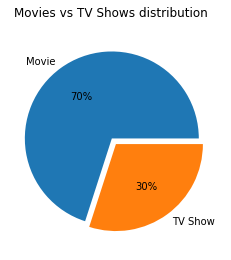

In [228]:
labels = ['Movie', 'TV Show']
plt.pie(df.groupby('type')['type'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
plt.suptitle('Movies vs TV Shows distribution')
plt.show()

**Inference**

* Netflix has 70% of its content as movies.

* TV Shows are clearly lesser than Movies.

In [229]:
top_release_years = df['release_year'].value_counts().head(10)

# Create the pie chart
fig = px.pie(values=top_release_years, names=top_release_years.index, labels=top_release_years.index)
fig.update_layout(title="Pie Chart for Distribution of Content based on Year Released")
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the chart
fig.show()

D:\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



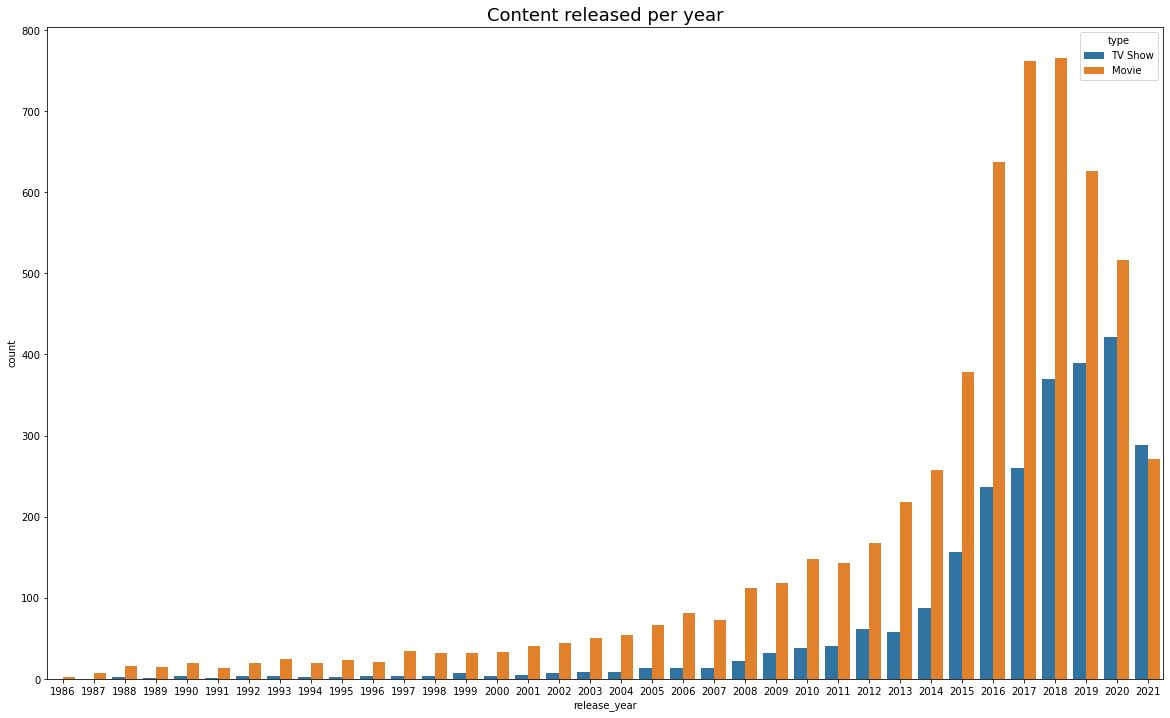

In [230]:
plt.figure(figsize=(20,12))
sns.countplot(x='release_year',hue='type', data=df.sort_values(by='release_year')[-1:200:-1]);
plt.title('Content released per year', size=18);

So, 2017 was the year when most of the movies were released. We can also observe that Netflix after the year 2018 is mostly concerned in producing more TV Shows. This is very clear in the year 2020 in which we see that TV Show production surmounted the Movie production. It is clear that Netflix is lately investing in producing more TV Shows than older years.

**Lets see the content distribution across countries.**

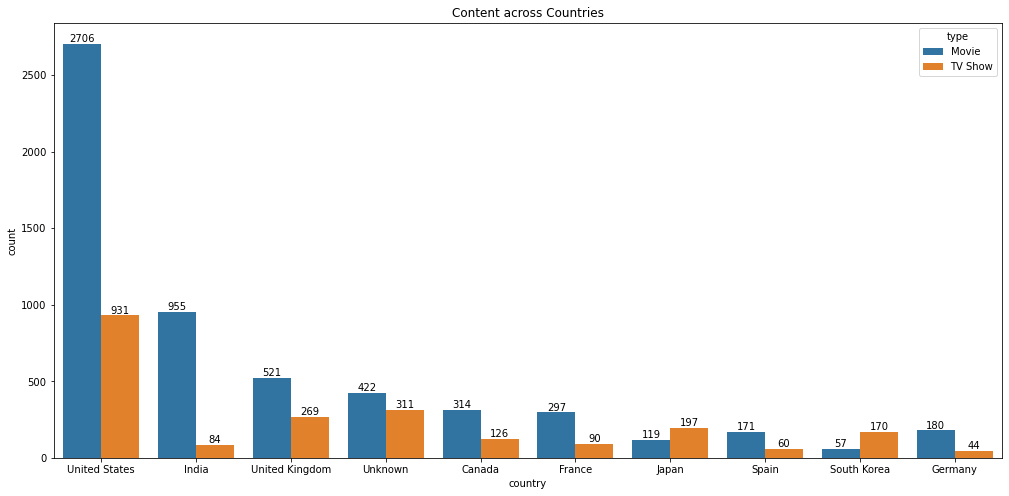

In [231]:
df_temp = df_new.drop_duplicates(subset = ['country', 'title'])

x = df_temp['country'].value_counts().head(10)

plt.figure(figsize = (17,8))
plt.title('Content across Countries')
label = sns.countplot(data = df_temp, x = 'country', hue = 'type', order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()

**Inference**

* US has the most content for movies followed by India and UK.
* TV Shows are mostly created in the US and UK.
* We can also observe that all the countries have more movies than TV Shows, whereas Japan and South Korea have more TV shows than movies.


**Lets see the top 10 Directors.**

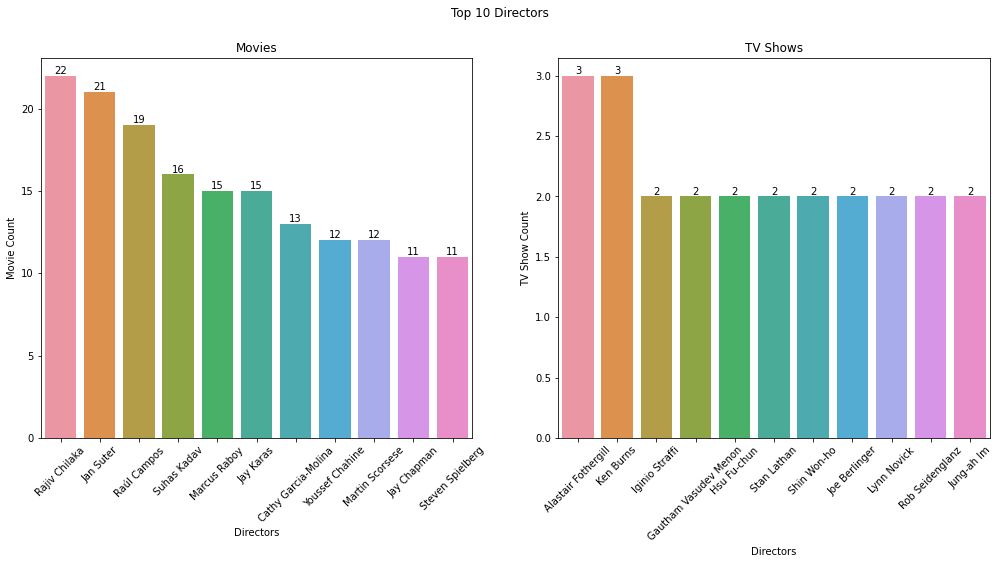

In [232]:
df_movies_temp = df_movies.drop_duplicates(subset = ['director','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['director','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='director', order = df_movies_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='director', order = df_tvs_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')

plt.show()

**Inference**

* Rajiv Chilaka, Jan Suter, Raul Campos are the most active directors with 22, 21 and 19 movies,
* Whereas for TV Shows all the directos have directed around 2-3 shows only.

**Lets see the top 10 Genres**

**Here we need unnested data of genres only so we will drop duplicates on genre, title group in df_movies and df_tvs.**


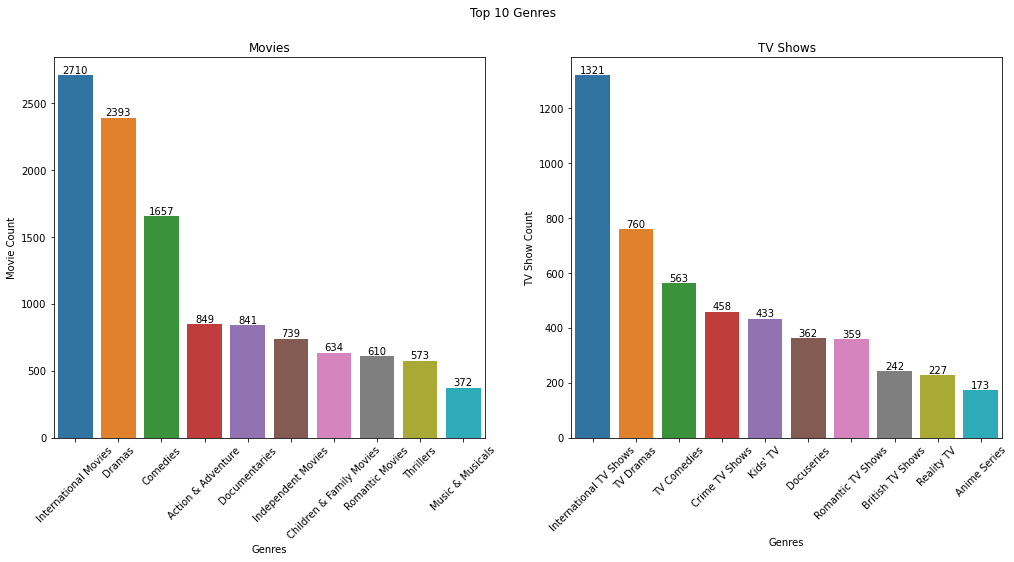

In [233]:
df_movies_temp = df_movies.drop_duplicates(subset = ['genre','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data= df_movies_temp, x='genre', order = df_movies_temp['genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='genre', order = df_tvs_temp['genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()

**Inference**

* From the above graph, it is inferred that most of the content fall under International followed by Drama and Comedy genre

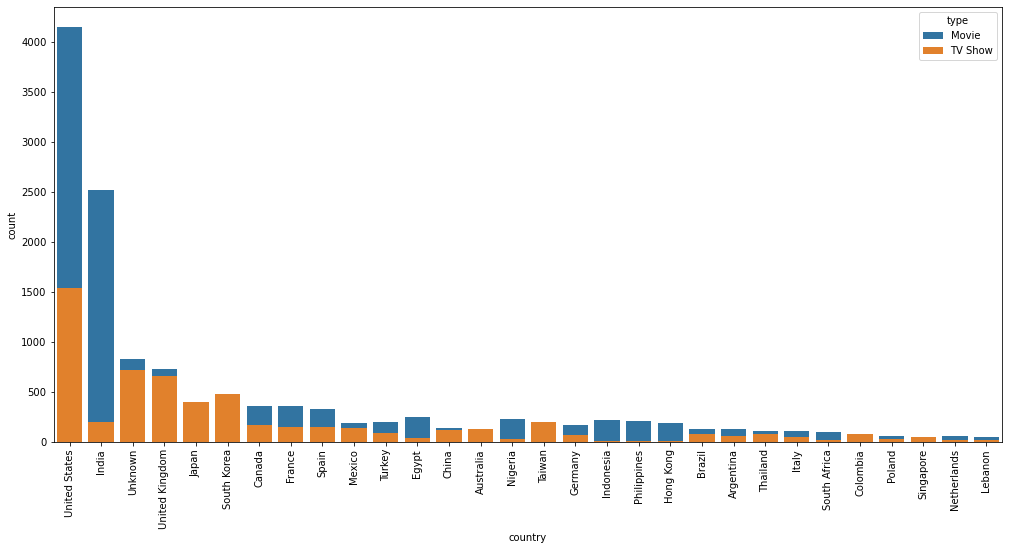

In [234]:
df_temp = df_new.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize = (17,8))
plt.xticks(rotation=90)
sns.countplot(data = df_temp, x='country', hue = 'type', dodge = False, order = df_temp['country'].value_counts().head(30).index)
plt.show()

**Lets see the content available age group wise**

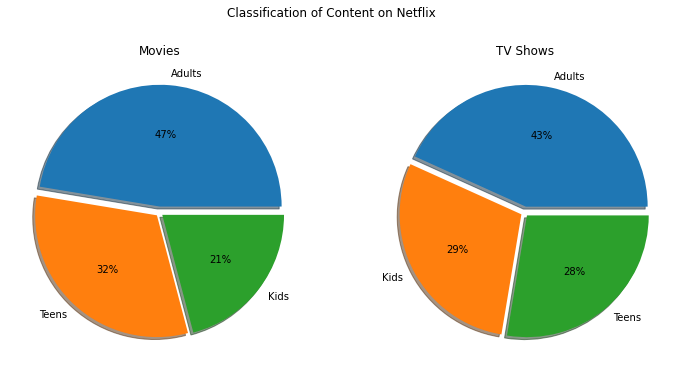

In [235]:
df_movies_temp = df_movies.drop_duplicates(subset = ['rating','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['rating','title'])

plt.figure(figsize = (12,6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(), labels = df_movies_temp['rating'].value_counts().index, autopct='%.0f%%', explode = (0.05,0.03,0.03), shadow = True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(), labels = df_tvs_temp['rating'].value_counts().index, autopct='%.0f%%', explode = (0.05,0.03,0.03), shadow = True)
plt.title('TV Shows')

plt.show()

**Inference**

* Most content on Netflix is for the adults followed by Teens and Kids.

**Now, lets see when does netflix add movies and tv shows the most**

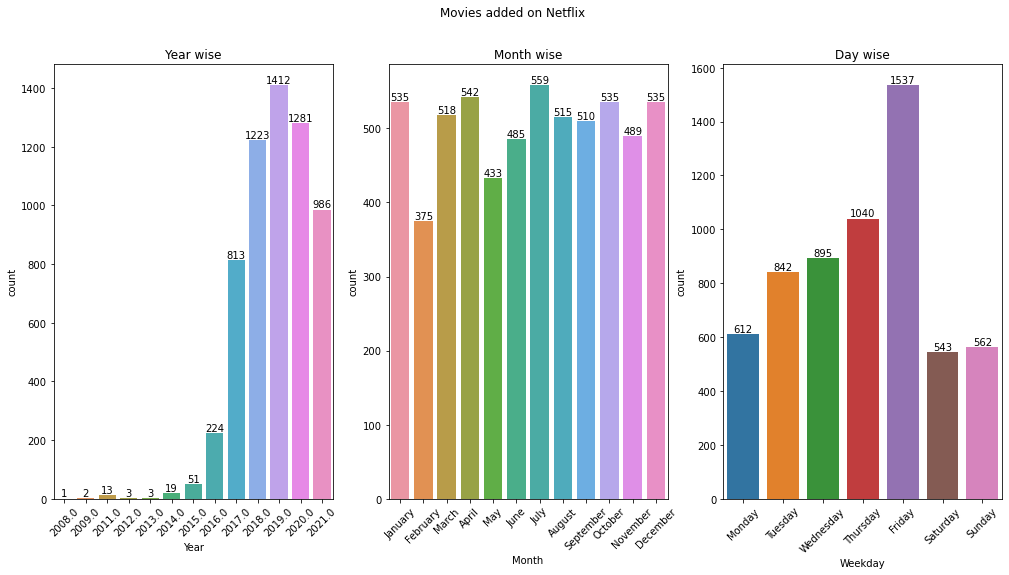

In [236]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])


mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]


plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_temp, x='year', order = mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_temp, x='month_name', order = mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_temp, x='weekday', order = mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

**Inference**

* As per the data, most movies were released in the year 2019 and 2020.
* They were released the most in July.
* We can also see that most movies were released on Friday.

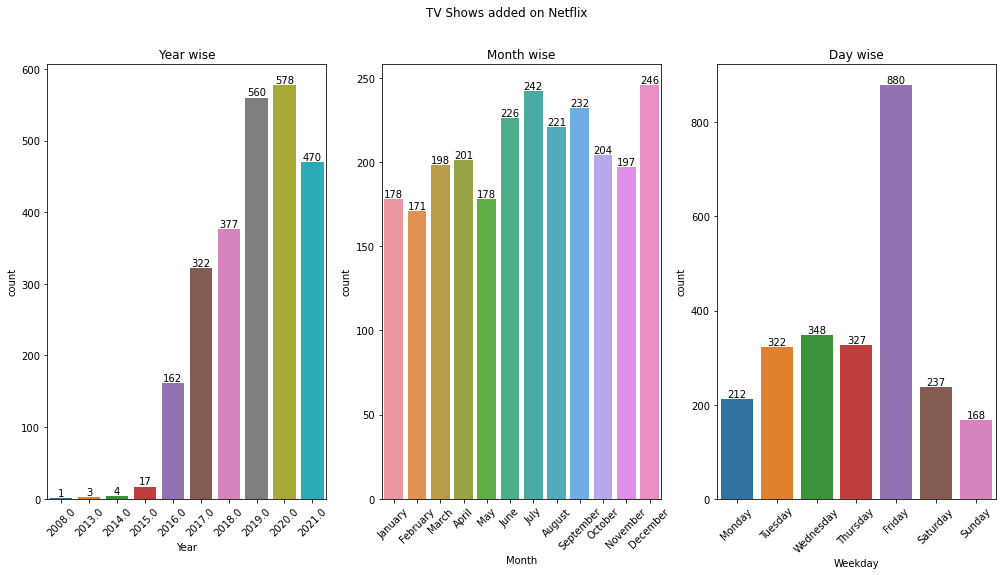

In [237]:
df_tvs_temp = df_tvs.drop_duplicates(subset = ['year','title'])

tv_year = df_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
tv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]


plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
label = sns.countplot(data=df_tvs_temp, x='year', order = tv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_tvs_temp, x='month_name', order = tv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_tvs_temp, x='weekday', order = tv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')


plt.show()

**Inference**

* As per the data, most TV Shows were released in the year 2019 and 2020.
* They were released the most in December followed by July and September.
* We can also see that most shows were released on Friday.

**Lets see the average duration of a movie and a average season of TV Show**

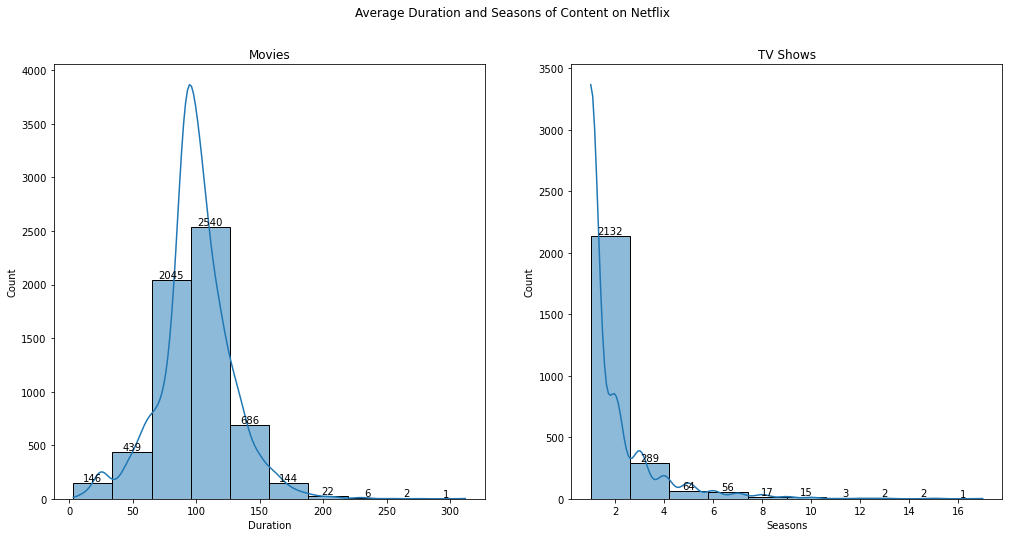

In [238]:
df_movies_temp = df_movies.drop_duplicates(subset = ['duration','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['seasons','title'])


plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
label = sns.histplot(df_movies_temp['duration'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label = sns.histplot(df_tvs_temp['seasons'].astype(int), bins=10, kde = True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

**Inference**

* Most (Around 4500) movies have duration between 65 and 125 minutes.
* Most(Around 2200) TV Shows have been produced for around 2 seasons.


In [239]:
tv_shows = df[df['type'] == 'TV Show']
tv_shows['duration'] = tv_shows['duration'].str.extract('(\d+)').astype(int)  # Extract only the number of seasons
top_tv_shows = tv_shows.sort_values(by='duration', ascending=False).head(20)

# Create the bar chart using Plotly Express
fig = px.bar(top_tv_shows, x='title', y='duration', title='Top 20 TV Shows by Number of Seasons')
fig.update_xaxes(title='TV Show Title')
fig.update_yaxes(title='Number of Seasons')
fig.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_27736\2344781793.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Lets see most active actors for movies and tv shows seperately.**

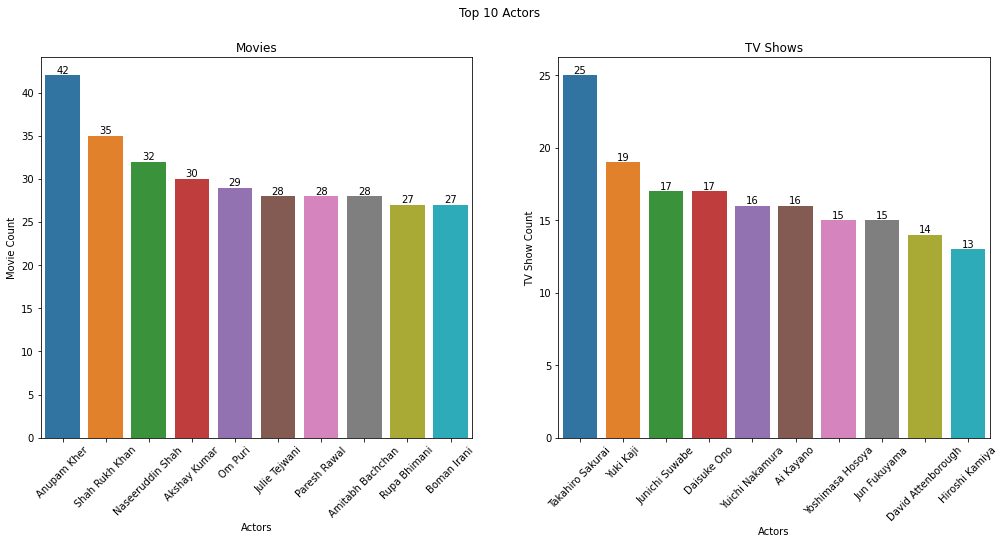

In [240]:
df_movies_temp = df_movies.drop_duplicates(subset = ['cast','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['cast','title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Actors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='cast', order = df_movies_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='cast', order = df_tvs_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('TV Show Count')

plt.show()

**Inference**

* We can clearly see that Anupam Kher has done the most amount of movies followed by Shah Rukh Khan and Naseeruddin Shah.

*  The top 10 actors for movies are all Indians, whereas the top 10 actors for TV Shows are from different countries.

* 8 out of the top 10 actors for movies are males and 2 are females.


**Lets see distribution of genre and rating among themselves.**

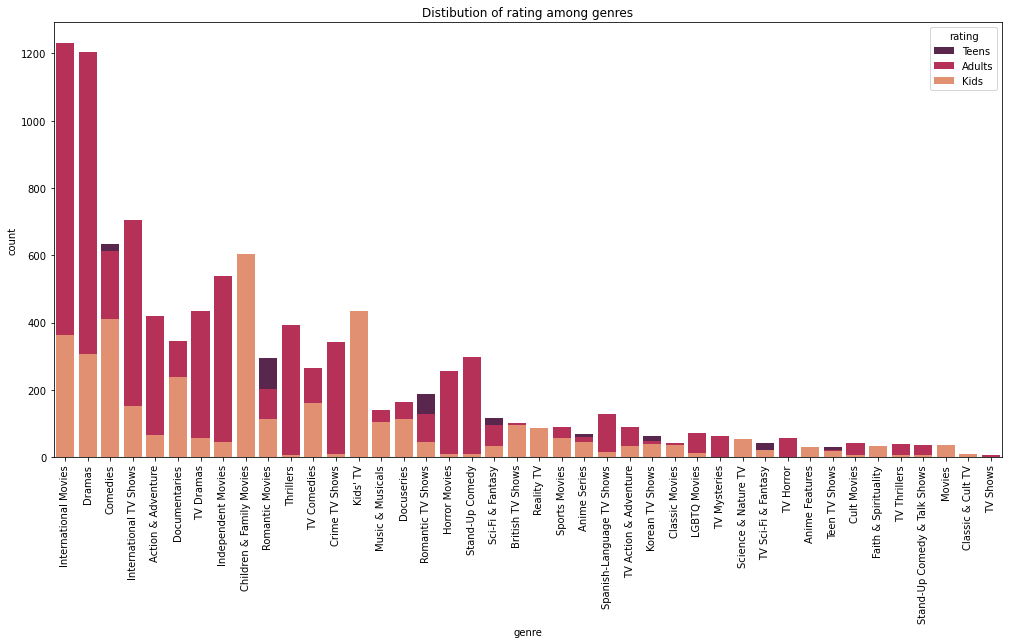

In [241]:
df_temp = df_new.drop_duplicates(subset = ['genre','title'])

plt.figure(figsize=(17,8))
plt.title('Distibution of rating among genres')
sns.countplot(data=df_temp, x='genre', hue = 'rating', dodge=False, order = df_temp['genre'].value_counts().index, palette='rocket')
plt.xticks(rotation=90)
plt.show()

**Inference**

* We can clearly see that most content(both movies and tv shows) are made for adults.

**Lets see distribution of genres across countries.**

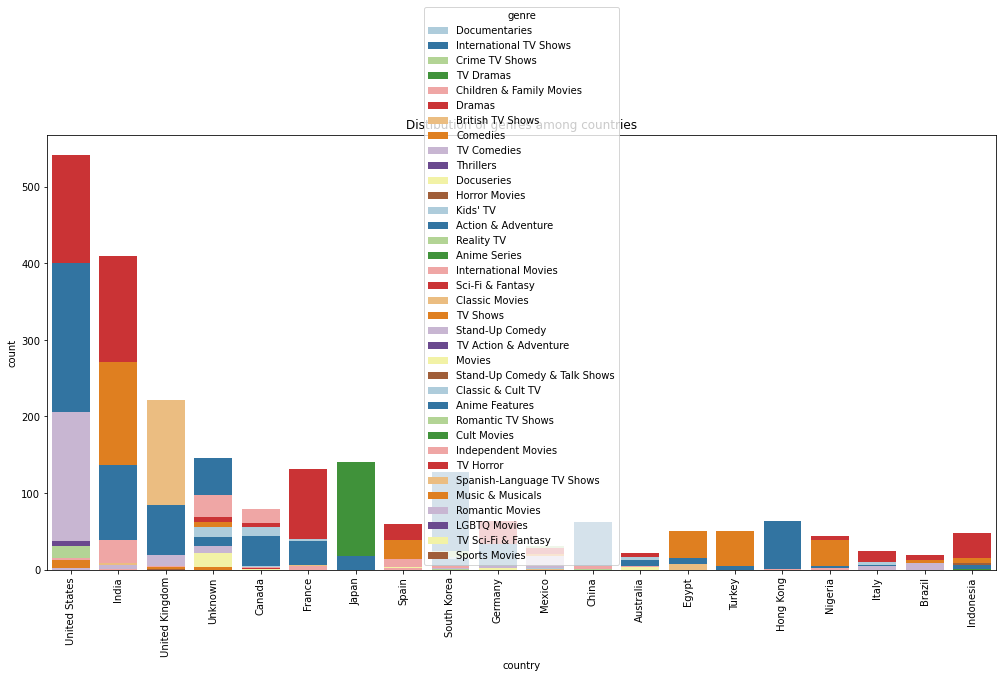

In [242]:
df_temp = df_new.drop_duplicates(subset = ['country','title'])

plt.figure(figsize=(17,8))
plt.title('Distibution of genres among countries')
sns.countplot(data=df_temp, x='country', hue = 'genre', dodge=False, order = df_temp['country'].value_counts().head(20).index, palette='Paired')
plt.xticks(rotation=90)
plt.show()

**Inference**

* We can observe that International(Blue color) and Drama(Red color) are the most type of content available on Netflix.

**Lets see countrywise content rating classification.**

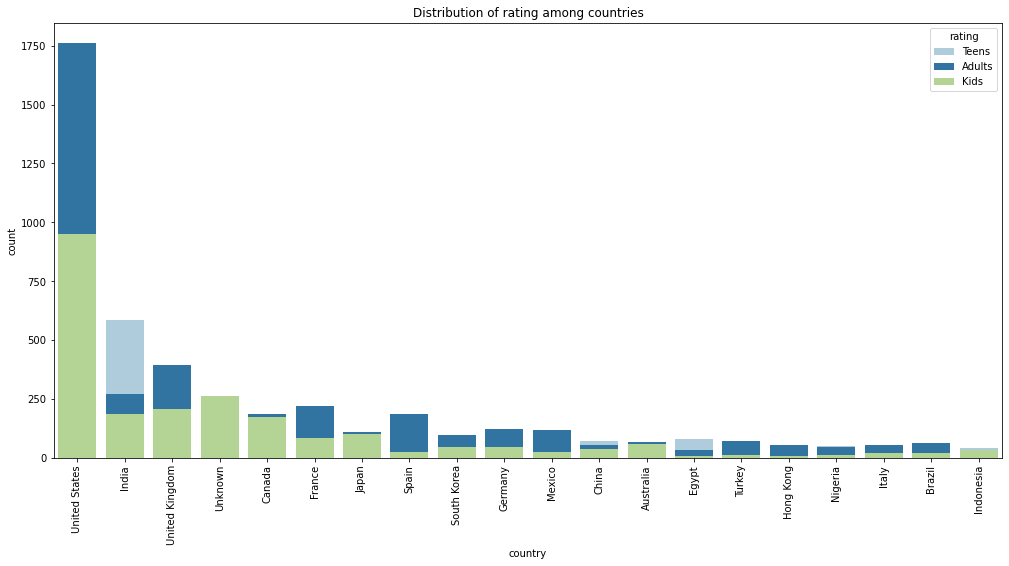

In [243]:
df_temp = df_new.drop_duplicates(subset = ['country','title'])

plt.figure(figsize=(17,8))
plt.title('Distribution of rating among countries')
sns.countplot(data=df_temp, x='country', hue = 'rating', dodge=False, order = df_temp['country'].value_counts().head(20).index, palette='Paired')
plt.xticks(rotation=90)
plt.show()

**Inference**

* We can see the in US and UK there is no content specially made for the teens, whereas in India we can see the that most of the content is made for teens.

**Recommendation**

* More content for teens should be added to atract newer audiences.

In [245]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24.0,9.0,2021.0,September,Friday


In [250]:
df_encoded = pd.get_dummies(df, columns=['type', 'rating'])

# Rename the columns
df_encoded = df_encoded.rename(columns={'type_Movie': 'type_Movie',
                                        'type_TV Show': 'type_TV_Show',
                                        'rating_Adults': 'rating_Adults',
                                        'rating_Kids': 'rating_Kids',
                                        'rating_Teens': 'rating_Teens'})

# Display the DataFrame with the renamed columns
df_encoded.shape

(8612, 19)

# ML

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [252]:
df_encoded

,title,director,cast,country,date_added,release_year,duration,genre,description,day,month,year,month_name,weekday,type_Movie,type_TV_Show,rating_Adults,rating_Kids,rating_Teens
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,1,0,0,0,1
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,0,1,1,0,0
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday,0,1,1,0,0
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday,0,1,1,0,0
5,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24.0,9.0,2021.0,September,Friday,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,9.0,3.0,2016.0,March,Wednesday,1,0,1,0,0
8802,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20.0,11.0,2019.0,November,Wednesday,1,0,1,0,0
8804,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1.0,11.0,2019.0,November,Friday,1,0,1,0,0
8805,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11.0,1.0,2020.0,January,Saturday,1,0,0,1,0


In [255]:
# Convert 'duration' column to string format
df_encoded['duration'] = df_encoded['duration'].astype(str)

# Extract numerical part of 'duration' column
df_encoded['duration'] = df_encoded['duration'].str.extract('(\d+)').astype(float)

# Extract relevant features and target variable
X = df_encoded[['release_year', 'type_Movie', 'type_TV_Show', 'rating_Adults', 'rating_Kids', 'rating_Teens']]
y = df_encoded['duration']

In [257]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [258]:
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 15.458391168542331


In [ ]:
df['duration'] = df['duration'].str.extract('(\d+)', expand=False)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

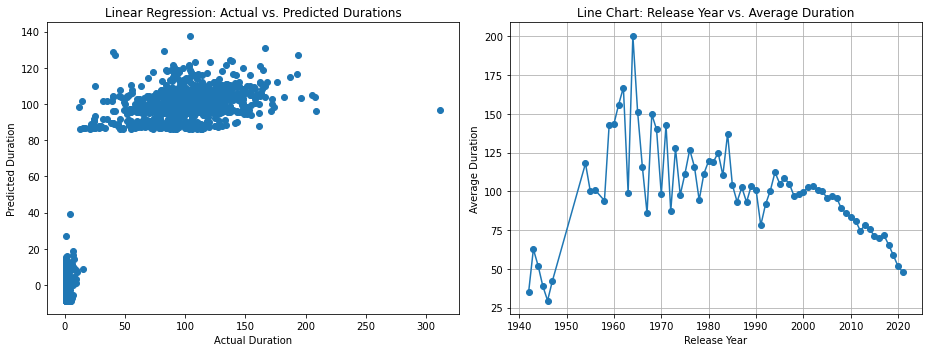

In [259]:
year_duration_mean = df.groupby('release_year')['duration'].mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# Scatter plot
axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel('Actual Duration')
axs[0].set_ylabel('Predicted Duration')
axs[0].set_title('Linear Regression: Actual vs. Predicted Durations')

# Line chart
axs[1].plot(year_duration_mean.index, year_duration_mean.values, marker='o')
axs[1].set_xlabel('Release Year')
axs[1].set_ylabel('Average Duration')
axs[1].set_title('Line Chart: Release Year vs. Average Duration')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

This code performs Linear Regression to predict the duration of movies and TV shows based on their release year, type, and rating. The scatter plot visualizes how well the model predicts the durations compared to the actual durations.

logistic regression

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [261]:
print(df_encoded.columns)

Index(['title', 'director', 'cast', 'country', 'date_added', 'release_year',
       'duration', 'genre', 'description', 'day', 'month', 'year',
       'month_name', 'weekday', 'type_Movie', 'type_TV_Show', 'rating_Adults',
       'rating_Kids', 'rating_Teens'],
      dtype='object')


In [262]:
df_encoded.head()

,title,director,cast,country,date_added,release_year,duration,genre,description,day,month,year,month_name,weekday,type_Movie,type_TV_Show,rating_Adults,rating_Kids,rating_Teens
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,90.0,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,1,0,0,0,1
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,0,1,1,0,0
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday,0,1,1,0,0
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday,0,1,1,0,0
5,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,1.0,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24.0,9.0,2021.0,September,Friday,0,1,1,0,0


In [286]:
le = LabelEncoder()
df_encoded['type_Movie_encoded'] = le.fit_transform(df_encoded['type_Movie'])
df_encoded['type_TV_Show_encoded'] = le.fit_transform(df_encoded['type_TV_Show'])
df_encoded['rating_Adults_encoded'] = le.fit_transform(df_encoded['rating_Adults'])
df_encoded['rating_Kids_encoded'] = le.fit_transform(df_encoded['rating_Kids'])
df_encoded['rating_Teens_encoded'] = le.fit_transform(df_encoded['rating_Teens'])

# Select relevant features and target variable
X = df_encoded[['release_year', 'type_Movie_encoded', 'type_TV_Show_encoded',
          'rating_Adults_encoded', 'rating_Kids_encoded', 'rating_Teens_encoded']]

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       932
           1       1.00      1.00      1.00       791

    accuracy                           1.00      1723
   macro avg       1.00      1.00      1.00      1723
weighted avg       1.00      1.00      1.00      1723



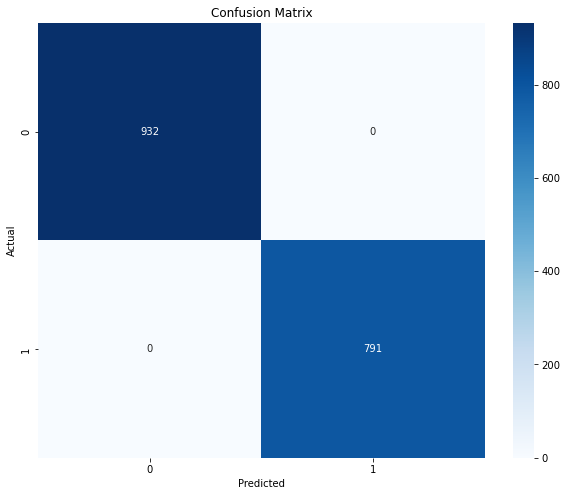

In [288]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
df.dropna(inplace=True)

In [290]:
# Encode categorical variables
le = LabelEncoder()
df_encoded['type_Movie_encoded'] = le.fit_transform(df_encoded['type_Movie'])
df_encoded['type_TV_Show_encoded'] = le.fit_transform(df_encoded['type_TV_Show'])
df_encoded['rating_Adults_encoded'] = le.fit_transform(df_encoded['rating_Adults'])
df_encoded['rating_Kids_encoded'] = le.fit_transform(df_encoded['rating_Kids'])
df_encoded['rating_Teens_encoded'] = le.fit_transform(df_encoded['rating_Teens'])

In [291]:
# Select relevant features and target variable
X = df_encoded[['release_year', 'rating_Adults_encoded', 'rating_Kids_encoded', 'rating_Teens_encoded']]
y = df_encoded['type_Movie_encoded']  # Assuming you want to predict the type (Movie or TV Show)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.21      0.28       509
           1       0.73      0.89      0.80      1214

    accuracy                           0.69      1723
   macro avg       0.59      0.55      0.54      1723
weighted avg       0.64      0.69      0.65      1723



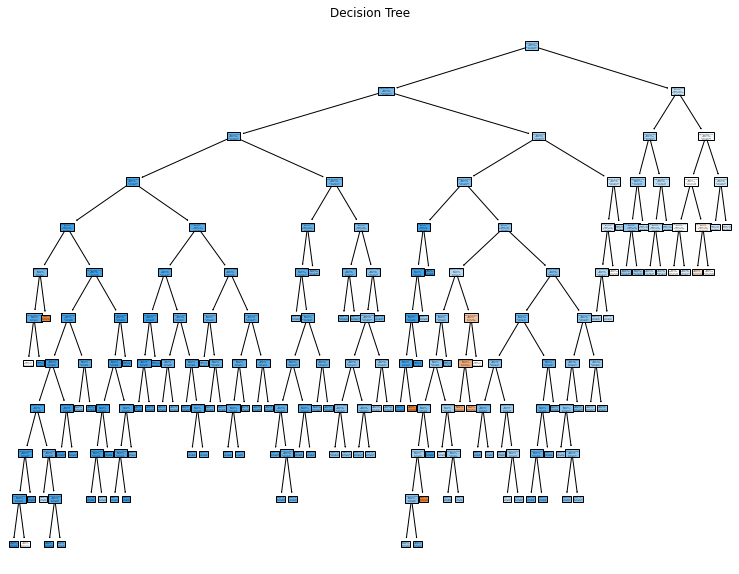

In [293]:
# Plot Decision Tree
plt.figure(figsize=(13, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['TV Show', 'Movie'], filled=True)
plt.title("Decision Tree")
plt.show()

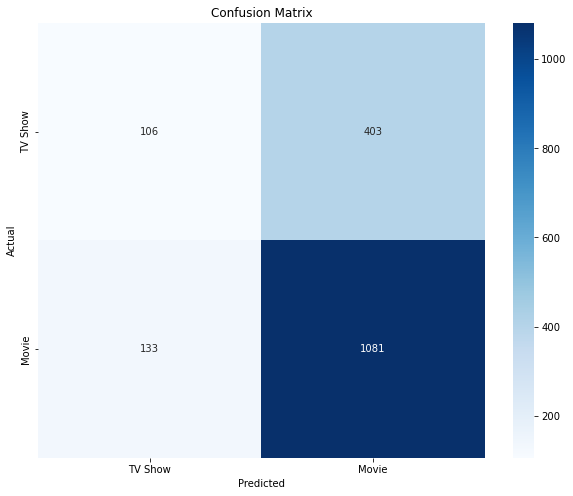

In [294]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['TV Show', 'Movie'], yticklabels=['TV Show', 'Movie'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This code will train a Decision Tree classifier to predict the type of a title (Movie or TV Show) based on the selected features and visualize the Decision Tree for interpretation. The confusion matrix will provide insights into the model's performance in predicting the type accurately.

Random Forest

In [295]:
X = df_encoded[['release_year', 'type_Movie_encoded', 'type_TV_Show_encoded']]
y = df_encoded['rating_Adults_encoded']  # Predicting Adults rating based on other features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [297]:
# Evaluate the Random Forest model
print("Random Forest Classification Report for Adults rating:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report for Adults rating:
              precision    recall  f1-score   support

           0       0.65      0.50      0.56       932
           1       0.54      0.68      0.60       791

    accuracy                           0.58      1723
   macro avg       0.59      0.59      0.58      1723
weighted avg       0.60      0.58      0.58      1723



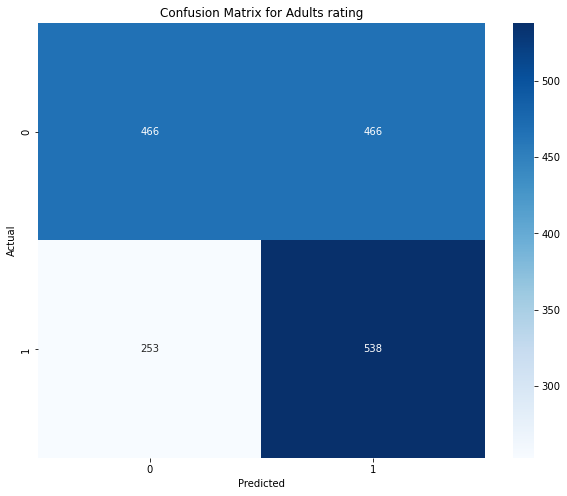

In [298]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Adults rating')
plt.show()